## Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)
m = 100 # Number of instances 
X = 2*np.random.rand(m,1) # Column vector
y = 4+3* X+ np.random.rand(m,1) # Column vector

(0.0, 15.0)

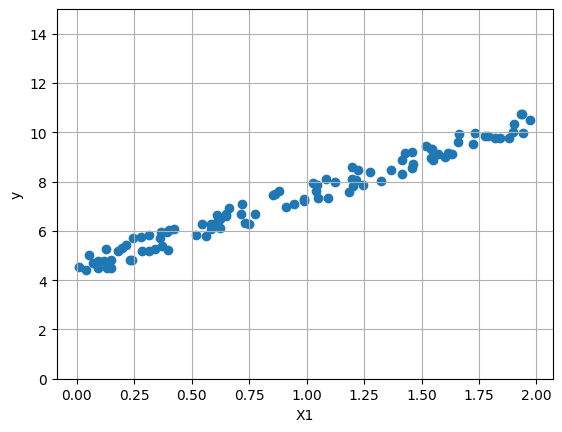

In [3]:
plt.scatter(X,y)
plt.grid()
plt.xlabel("X1")
plt.ylabel("y")
plt.ylim([0,15])

In [4]:
#lets compute the value for normal equlation. 

from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X) # add Xtheta to 1 for each instance. 
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @y

In [5]:
# the function used to generate data is y = 4+3X1 + Gaussian noise
theta_best

array([[4.51359766],
       [2.98323418]])

In [6]:
# here instead 4 its 4.5 and instead 3 its 2.9

In [7]:
# Let make predictions 
X_new = np.array([[0],[2]])
X_new_b = add_dummy_feature(X_new)
y_predict = X_new_b @ theta_best
y_predict

array([[ 4.51359766],
       [10.48006601]])

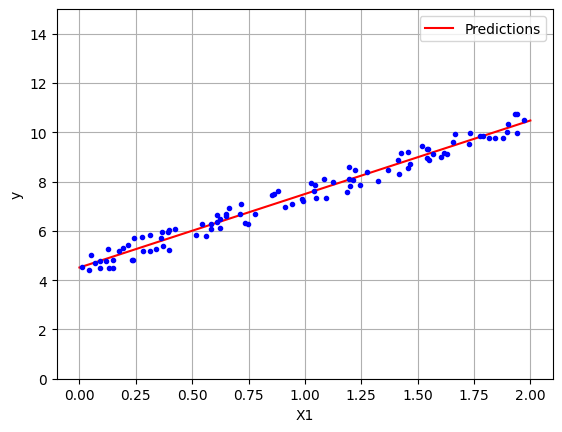

In [8]:
plt.plot(X_new, y_predict, "r-", label = "Predictions")
plt.plot(X,y, "b.")
plt.grid()
plt.xlabel("X1")
plt.ylabel("y")
plt.ylim([0,15])
plt.legend();

In [9]:
# Linear Regression

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression()

In [10]:
# intercept is bias # coef_ is feature weights 
lin_reg.intercept_, lin_reg.coef_

(array([4.51359766]), array([[2.98323418]]))

In [11]:
lin_reg.predict(X_new)

array([[ 4.51359766],
       [10.48006601]])

## Gradient Descent

### Main idea to tweak parameters iteratively in order to minimize the cost function

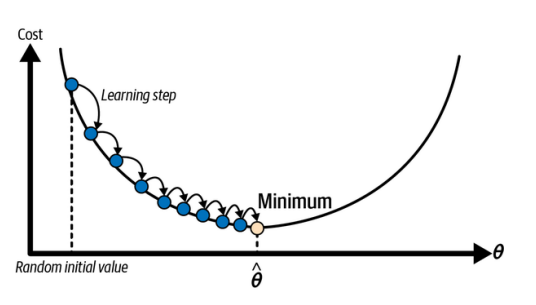

## Implementation of Gradient descent step

In [14]:
eta  = 0.1 # learning rate
n_epochs = 1000
x = len(X_b) # number of instances

np.random.seed(42)
theta = np.random.randn(2,1) # randomly initialized model parameters

for epoch in range(n_epochs):
    gradients = 2/ m *X_b.T @ (X_b @ theta -y)
    theta = theta - eta *gradients

In [15]:
theta

array([[4.51359766],
       [2.98323418]])

### Stochastic Gradient Descent

In [17]:
# It pick a random instance in the training set at every step ans compute the 
# gradients based on that single instance. 



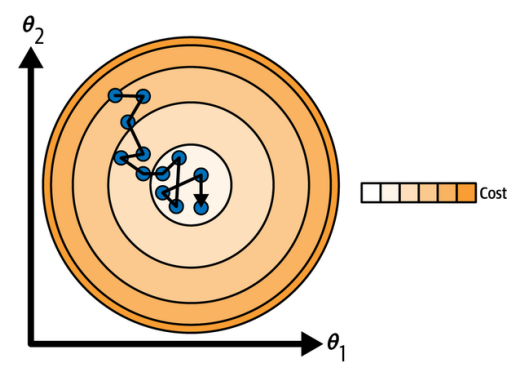

In [29]:
n_epochs = 50
t0, t1 = 5,50 # learning schedule hyperparameter

def learning_schedule(t):
    return t0/(t+t1)
np.random.seed(42)
theta = np.random.randn(2,1) # random initialization

for epoch in range(n_epochs):
    for iteration in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index: random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2*xi.T@ (xi @ theta -yi)
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients

In [30]:
theta

array([[4.51548062],
       [2.9775157 ]])

In [33]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters
def learning_schedule(t):
    return t0 / (t + t1)
np.random.seed(42)
theta = np.random.randn(2, 1) # random initialization
for epoch in range(n_epochs):
    for iteration in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T @ (xi @ theta - yi) # for SGD, do not divide by m
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients

In [34]:
theta

array([[4.51548062],
       [2.9775157 ]])

In [35]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01,
n_iter_no_change=100, random_state=42)
sgd_reg.fit(X, y.ravel()) # y.ravel() because fit() expects 1D target

SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

In [36]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.50316965]), array([2.99156535]))

In [ ]:
215